In [43]:
import pandas as pd
import numpy as np
import pycmap
import plotly.express as px

import matplotlib.pyplot as plt

import cartopy.crs as ccrs         # to plot maps with different projections
import cartopy.feature as cfeature # to plot coastlines, land, borders, etc.

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture 
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, normalize

In [2]:
key ="22b9c870-18ed-11ed-be7c-2b540ba2c4c4"    # reading the last line from a file using a system command
api = pycmap.API(token=key)

In [3]:
HOT_bottle = api.get_dataset('tblHOT_Bottle')
HOT_bottle.keys()

Index(['botid_HOT', 'time', 'date_time', 'pressure_ctd_bottle_hot',
       'potential_temperature_ctd_bottle_hot',
       'potential_density_ctd_bottle_hot', 'temperature_ctd_bottle_hot',
       'salinity_ctd_bottle_hot', 'oxygen_ctd_bottle_hot',
       'salinity_bottle_hot', 'oxygen_bottle_hot', 'dic_bottle_hot',
       'ph_bottle_hot', 'alk_bottle_hot', 'PO4_bottle_hot',
       'NO2_NO3_bottle_hot', 'SiO4_bottle_hot', 'dop_bottle_hot',
       'don_bottle_hot', 'doc_bottle_hot', 'tdp_bottle_hot', 'tdn_bottle_hot',
       'pc_bottle_hot', 'pn_bottle_hot', 'pp_bottle_hot', 'lln_bottle_hot',
       'llp_bottle_hot', 'chl_bottle_hot', 'phaeo_bottle_hot',
       'HPLC_chl3_bottle_hot', 'HPLC_chl12_bottle_hot',
       'HPLC_chlplus_bottle_hot', 'HPLC_peridinin_bottle_hot',
       'HPLC_but19_bottle_hot', 'HPLC_fuco_bottle_hot',
       'HPLC_hex19_bottle_hot', 'HPLC_prasino_bottle_hot',
       'HPLC_diadino_bottle_hot', 'HPLC_zeaxan_bottle_hot',
       'HPLC_chlb_bottle_hot', 'HPLC_chla_bott

In [11]:
hot=HOT_bottle[['oxygen_ctd_bottle_hot', 'potential_temperature_ctd_bottle_hot','salinity_ctd_bottle_hot','PO4_bottle_hot',
       'NO2_NO3_bottle_hot', 'SiO4_bottle_hot','chl_bottle_hot','depth' ]]
hot=hot[hot.depth<300].dropna()

In [35]:
hot = hot.reset_index(drop=True)
print(hot.columns)
print(hot.shape)

Index(['oxygen_ctd_bottle_hot', 'potential_temperature_ctd_bottle_hot',
       'salinity_ctd_bottle_hot', 'PO4_bottle_hot', 'NO2_NO3_bottle_hot',
       'SiO4_bottle_hot', 'chl_bottle_hot', 'depth'],
      dtype='object')
(2383, 8)


In [38]:
column_name = hot.columns


Index(['oxygen_ctd_bottle_hot', 'potential_temperature_ctd_bottle_hot',
       'salinity_ctd_bottle_hot', 'PO4_bottle_hot', 'NO2_NO3_bottle_hot',
       'SiO4_bottle_hot', 'chl_bottle_hot', 'depth'],
      dtype='object')

In [29]:
features=np.array(hot.drop(columns='chl_bottle_hot'))
features=features/np.std(features,axis=0)
features2 = np.transpose(features)

In [33]:
features2

array([[1.81924595e+01, 1.86102767e+01, 1.83926636e+01, ...,
        1.87669582e+01, 1.86537994e+01, 1.68606670e+01],
       [1.06179049e+01, 1.06094048e+01, 1.05531378e+01, ...,
        9.14700370e+00, 8.88922073e+00, 8.05102182e+00],
       [1.97816961e+02, 1.97836184e+02, 1.97865585e+02, ...,
        1.99739303e+02, 1.99594562e+02, 1.98284542e+02],
       ...,
       [4.13251023e-02, 5.78551432e-02, 4.13251023e-02, ...,
        1.73565429e-01, 2.14890532e-01, 2.06625511e+00],
       [1.20011087e+00, 5.82578091e-02, 1.20011087e+00, ...,
        1.42149054e+00, 1.61956709e+00, 2.58664672e+00],
       [3.75405846e-01, 8.18101419e-01, 1.25902621e+00, ...,
        2.21524865e+00, 2.63138249e+00, 3.08824432e+00]])

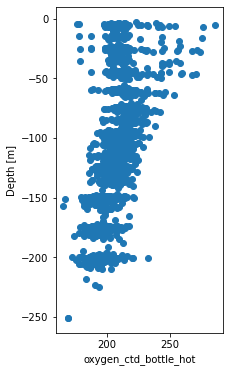

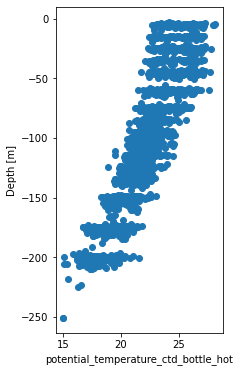

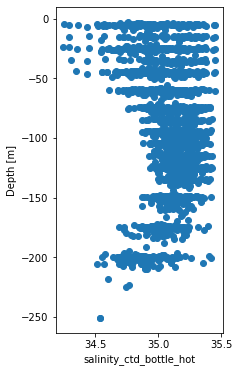

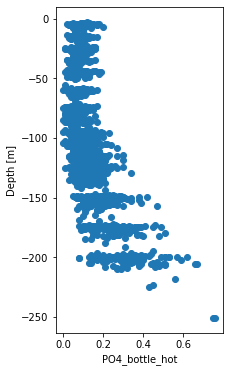

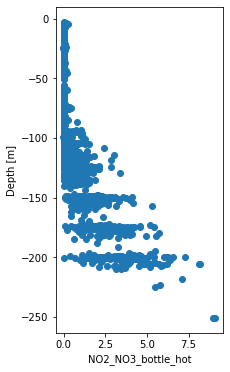

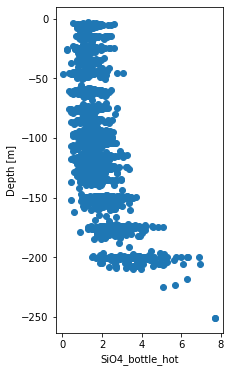

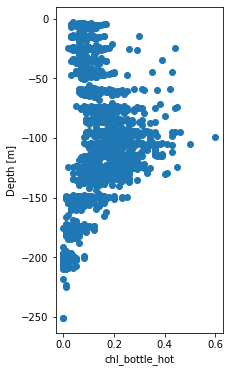

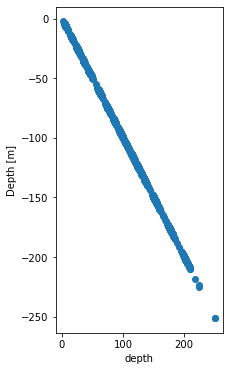

In [39]:
cols=hot.keys()[1:]

for i in range(8):
    plt.figure(figsize=(3,6))
    # plt.subplot(i+1,8,i+1)
    plt.scatter(hot[column_name[i]],-hot['depth'])
    plt.xlabel(column_name[i])
    plt.ylabel('Depth [m]')

Making the Gaussian Mixture Model:

In [44]:
# Standardize data
scaler = StandardScaler() 
scaled_hot = scaler.fit_transform(hot) 
  
# Normalizing the Data 
normalized_hot = normalize(scaled_hot) 
  
# Converting the numpy array into a pandas DataFrame 
normalized_hot = pd.DataFrame(normalized_hot) 
  
# Reducing the dimensions of the data 
pca = PCA(n_components = 4) 
X_principal = pca.fit_transform(normalized_hot) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2', 'P3', 'P4'] 
#P linear combination of nutrients 
  
X_principal.head(2)

P1        P2        P3        P4
0 -0.744496  0.275273  0.286930 -0.297030
1 -0.714562  0.156688  0.148154 -0.178729

In [45]:
pca.explained_variance_ratio_

array([0.45119467, 0.23732713, 0.11800566, 0.07600177])

In [46]:
gmm = GaussianMixture(n_components = 4) 
gmm.fit(X_principal)

GaussianMixture(n_components=4)

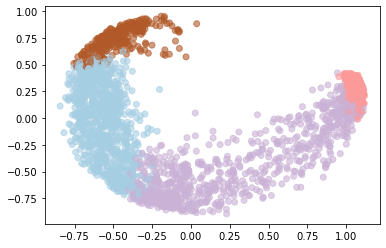

In [50]:
# Visualizing the clustering, only use the first two components. 
plt.scatter(X_principal['P1'], X_principal['P2'], 
           c = GaussianMixture(n_components = 4).fit_predict(X_principal), cmap ='Paired', alpha = 0.6) 
plt.show() 

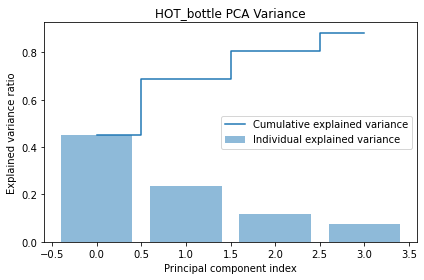

In [51]:
exp_var_pca = pca.explained_variance_ratio_

cum_sum_eigenvalues = np.cumsum(exp_var_pca)

plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.title('HOT_bottle PCA Variance')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'BIC of # Clusters')

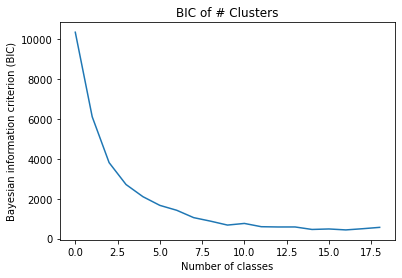

In [52]:
BIC=np.array([]);
for K in range(1,20):
    gmm = GaussianMixture(n_components=K)
    gmm.fit_predict(X_principal)
    bic=gmm.bic(X_principal)
    BIC=np.append(BIC,bic)

plt.plot(BIC); 
plt.xlabel('Number of classes'); 
plt.ylabel('Bayesian information criterion (BIC)')
plt.title('BIC of # Clusters')
# how to choose number of classes? Points without too much changes or other criterias

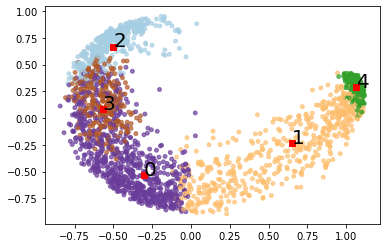

In [55]:
gmm = GaussianMixture(n_components = 5) 
gmm.fit(X_principal)

x_mean,y_mean=gmm.means_[:,0],gmm.means_[:,1]

# Visualizing the clustering, only use the first two components. 
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = gmm.fit_predict(X_principal), cmap = 'Paired', alpha = 0.7, s = 15) 

for k in range(5):
    plt.plot(x_mean[k],y_mean[k],'rs',markersize=6)
    plt.annotate(str(k), (x_mean[k],y_mean[k]), fontsize=20) 
      
plt.show() 

In [56]:
kmeans_inertias = []

for i in range(1, 21):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_pca.fit(X_principal)
    kmeans_inertias.append(kmeans_pca.inertia_)

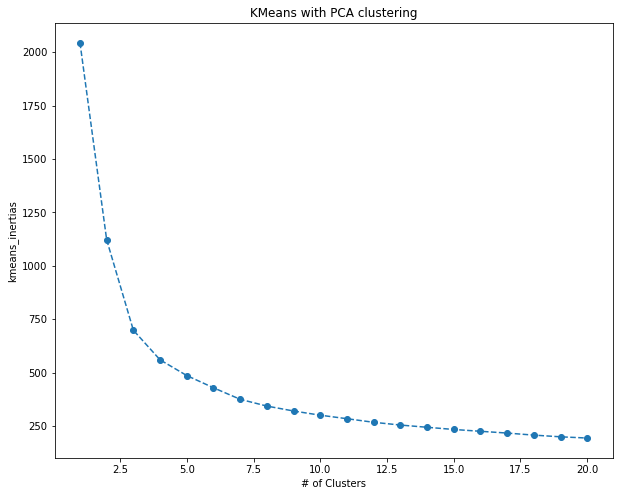

In [57]:
plt.figure(figsize=(10, 8))
plt.plot(range(1,21), kmeans_inertias, marker = 'o', linestyle = '--')
plt.xlabel("# of Clusters")
plt.ylabel("kmeans_inertias")
plt.title("KMeans with PCA clustering")
plt.show()